# Part 1

## Exercise 1

In [ ]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print("The train_data size is", len(train_data), "and the test_data size is", len(test_data))
print("The train_data shape is", train_data.shape, "and the test_data shape is", test_data.shape)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


The train_data size is 25000 and the test_data size is 25000
The train_data shape is (25000,) and the test_data shape is (25000,)


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


## Exercise 2

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
  # Create an all-zero matrix of shape (len(sequences), dimension)
  results = np.zeros ((len(sequences), dimension))
  for i , sequence in enumerate (sequences):
    results [i, sequence] = 1. # set specific indices of results [i] to 1s
  return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray (train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print("The x_train size is", len(x_train), "and the x_test size is", len(x_test))
print("The x_train shape is", x_train.shape, "and the x_test shape is", x_test.shape)

The x_train size is 25000 and the x_test size is 25000
The x_train shape is (25000, 10000) and the x_test shape is (25000, 10000)


## Exercise 3

In [ ]:
from tensorflow import keras

original_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# For the network compilation
original_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

The binary crossentropy loss is a sigmoid activation plus a crossentropy loss. Unlike softmax loss, it is independent for each vector component (class), meaning that the loss computed for every CNN output vector component is not affected by other component values.

## Exercise 4

In [ ]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
smaller_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

## Exercise 5

In [ ]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 4s 55ms/step - loss: 0.5400 - acc: 0.7445 - val_loss: 0.3251 - val_acc: 0.8818
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2635 - acc: 0.9084 - val_loss: 0.2825 - val_acc: 0.8905
Epoch 3/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1956 - acc: 0.9340 - val_loss: 0.2812 - val_acc: 0.8891
Epoch 4/20
49/49 [==============================] - 1s 31ms/step - loss: 0.1584 - acc: 0.9480 - val_loss: 0.3322 - val_acc: 0.8696
Epoch 5/20
49/49 [==============================] - 2s 32ms/step - loss: 0.1351 - acc: 0.9543 - val_loss: 0.3169 - val_acc: 0.8788
Epoch 6/20
49/49 [==============================] - 2s 31ms/step - loss: 0.1200 - acc: 0.9595 - val_loss: 0.3628 - val_acc: 0.8674
Epoch 7/20
49/49 [==============================] - 1s 30ms/step - loss: 0.1144 - acc: 0.9631 - val_loss: 0.3576 - val_acc: 0.8728
Epoch 8/20
49/49 [==============================] - 2s 31ms/step - loss: 0.0962 - a

## Exercise 6

In [ ]:
smaller_hist = smaller_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 36ms/step - loss: 0.5985 - acc: 0.7397 - val_loss: 0.4353 - val_acc: 0.8575
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3731 - acc: 0.8861 - val_loss: 0.3439 - val_acc: 0.8765
Epoch 3/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2729 - acc: 0.9082 - val_loss: 0.2966 - val_acc: 0.8870
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2219 - acc: 0.9264 - val_loss: 0.2813 - val_acc: 0.8900
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1876 - acc: 0.9384 - val_loss: 0.2807 - val_acc: 0.8880
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1634 - acc: 0.9482 - val_loss: 0.2850 - val_acc: 0.8858
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1416 - acc: 0.9558 - val_loss: 0.2941 - val_acc: 0.8824
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1266 - a

## Exercise 7

In [ ]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']

## Exercise 8

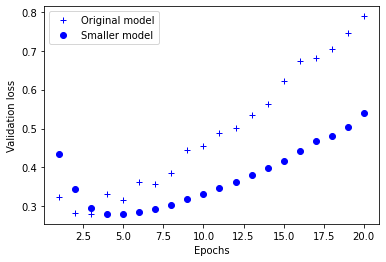

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 21)

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

The original model starts overfitting after 3 epochs and the smaller model starts overfitting after 5 models (and its performance degrades more slowly once it starts overfitting).

## Exercise 9

In [ ]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
bigger_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

## Exercise 10

In [ ]:
bigger_hist = bigger_model.fit(x_train, y_train,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 17s 321ms/step - loss: 0.6346 - acc: 0.7287 - val_loss: 0.3869 - val_acc: 0.8190
Epoch 2/20
49/49 [==============================] - 14s 294ms/step - loss: 0.2286 - acc: 0.9108 - val_loss: 0.3956 - val_acc: 0.8414
Epoch 3/20
49/49 [==============================] - 14s 293ms/step - loss: 0.1287 - acc: 0.9506 - val_loss: 0.3483 - val_acc: 0.8778
Epoch 4/20
49/49 [==============================] - 15s 301ms/step - loss: 0.0522 - acc: 0.9813 - val_loss: 0.3997 - val_acc: 0.8837
Epoch 5/20
49/49 [==============================] - 15s 298ms/step - loss: 0.0277 - acc: 0.9940 - val_loss: 0.4930 - val_acc: 0.8828
Epoch 6/20
49/49 [==============================] - 14s 294ms/step - loss: 0.0023 - acc: 0.9998 - val_loss: 0.6999 - val_acc: 0.8816
Epoch 7/20
49/49 [==============================] - 14s 297ms/step - loss: 0.0105 - acc: 0.9989 - val_loss: 0.7612 - val_acc: 0.8530
Epoch 8/20
49/49 [==============================] - 14s 297ms/step - 

## Exercise 11

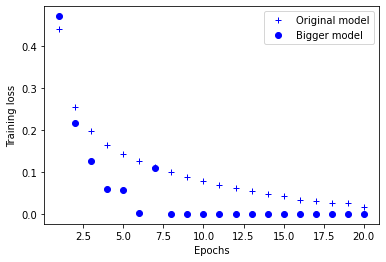

In [ ]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

## Exercise 12

In [ ]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu', kernel_regularizer = keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer = 'rmsprop',
                       loss = 'binary_crossentropy',
                       metrics = ['acc'])

## Exercise 13

In [ ]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 40ms/step - loss: 0.5991 - acc: 0.7562 - val_loss: 0.4053 - val_acc: 0.8797
Epoch 2/20
49/49 [==============================] - 1s 26ms/step - loss: 0.3430 - acc: 0.9074 - val_loss: 0.3762 - val_acc: 0.8664
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2832 - acc: 0.9198 - val_loss: 0.3360 - val_acc: 0.8878
Epoch 4/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2522 - acc: 0.9316 - val_loss: 0.3384 - val_acc: 0.8852
Epoch 5/20
49/49 [==============================] - 1s 27ms/step - loss: 0.2426 - acc: 0.9344 - val_loss: 0.3452 - val_acc: 0.8828
Epoch 6/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2367 - acc: 0.9350 - val_loss: 0.3516 - val_acc: 0.8804
Epoch 7/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2280 - acc: 0.9399 - val_loss: 0.3703 - val_acc: 0.8760
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 0.2182 - a

## Exercise 14

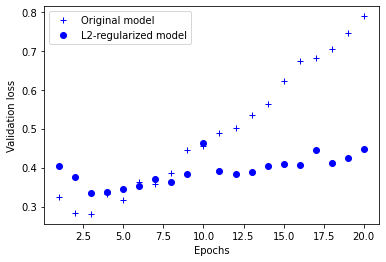

In [ ]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

We can see that the model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), 
even though both models have the same number of parameters.

## Exercise 15

In [ ]:
dpt_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

## Exercise 16

In [ ]:
dpt_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 34ms/step - loss: 0.6404 - acc: 0.6176 - val_loss: 0.4469 - val_acc: 0.8656
Epoch 2/20
49/49 [==============================] - 2s 31ms/step - loss: 0.4659 - acc: 0.7961 - val_loss: 0.3377 - val_acc: 0.8788
Epoch 3/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3750 - acc: 0.8528 - val_loss: 0.2944 - val_acc: 0.8889
Epoch 4/20
49/49 [==============================] - 2s 31ms/step - loss: 0.3063 - acc: 0.8900 - val_loss: 0.2774 - val_acc: 0.8909
Epoch 5/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2713 - acc: 0.9088 - val_loss: 0.2795 - val_acc: 0.8893
Epoch 6/20
49/49 [==============================] - 2s 31ms/step - loss: 0.2396 - acc: 0.9196 - val_loss: 0.3105 - val_acc: 0.8814
Epoch 7/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2180 - acc: 0.9268 - val_loss: 0.2957 - val_acc: 0.8874
Epoch 8/20
49/49 [==============================] - 1s 30ms/step - loss: 0.2017 - a

## Exercise 17

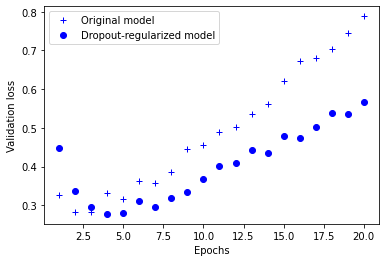

In [ ]:
dpt_model_val_loss = dpt_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()
plt.show()

We can see a clear improvement with this new model.  
We conclude that the most common ways to prevent overfitting in neural networks are the following:
- Getting more training data.
- Reducing the capacity of the network.
- Adding weight regularization.
- Adding dropout.

# Part 2

## Exercise 1

In [ ]:
try :
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception :
  pass
from keras . datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print("The train_data size is", len(train_data), "and the test_data size is", len(test_data))
print("The train_data shape is", train_data.shape, "and the test_data shape is", test_data.shape)
print("Here is the median value of the first owner-occupied homes (in thousands of dollars) :", train_targets[0])

The train_data size is 404 and the test_data size is 102
The train_data shape is (404, 13) and the test_data shape is (102, 13)
Here is the median value of the first owner-occupied homes (in thousands of dollars) : 15.2


## Exercise 2

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
test_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data /= std

In this way the feature is centered around 0 and has a unit standard deviation.

## Exercise 3

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

## Exercise 4

In [ ]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
  all_scores.append(val_mae)

processing fold # 0
4/4 [==============================] - 0s 3ms/step - loss: 8.4824 - mae: 1.9388
processing fold # 1
4/4 [==============================] - 0s 2ms/step - loss: 31.4877 - mae: 3.7097
processing fold # 2
4/4 [==============================] - 0s 2ms/step - loss: 17.4626 - mae: 2.9804
processing fold # 3
4/4 [==============================] - 0s 2ms/step - loss: 11.9999 - mae: 2.4941


## Exercise 5

In [ ]:
print(all_scores)
np.mean(all_scores)

[1.9388014078140259, 3.709718942642212, 2.9804084300994873, 2.4941015243530273]


2.780757576227188

## Exercise 6

In [ ]:
num_epochs = 500
all_mae_history_train = []
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  mae_history_train = history.history['mae']
  print(mae_history_train)
  all_mae_history_train.append(mae_history_train)
  all_mae_histories.append(mae_history)

processing fold # 0
[10.428897857666016, 3.7943179607391357, 3.2296698093414307, 2.815258264541626, 2.62591814994812, 2.592055082321167, 2.5357367992401123, 2.439985513687134, 2.3653812408447266, 2.3792717456817627, 2.2804348468780518, 2.2352287769317627, 2.25079345703125, 2.17292857170105, 2.182953357696533, 2.1621270179748535, 2.107107639312744, 2.0728814601898193, 2.1202890872955322, 2.0593061447143555, 2.0743935108184814, 1.9904311895370483, 2.003239870071411, 1.9540385007858276, 2.0076534748077393, 2.029946804046631, 1.955426812171936, 2.0254015922546387, 1.9491301774978638, 1.9283334016799927, 1.8916795253753662, 1.8443697690963745, 1.8629693984985352, 1.915870189666748, 1.8419638872146606, 1.8493964672088623, 1.7742140293121338, 1.862583875656128, 1.852779746055603, 1.8492729663848877, 1.782726764678955, 1.7793833017349243, 1.8042281866073608, 1.7842669486999512, 1.8263825178146362, 1.7856816053390503, 1.7639540433883667, 1.8165124654769897, 1.7721434831619263, 1.691203236579895

## Exercise 7

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_mae_history_train = [np.mean([x[i] for x in all_mae_history_train]) for i in range(num_epochs)]

average_mae_history

[4.403945088386536,
 3.3415854573249817,
 3.1253063082695007,
 2.854921281337738,
 2.818695068359375,
 2.5924323201179504,
 2.673301577568054,
 2.5962324142456055,
 2.6547186970710754,
 2.7203423380851746,
 2.5221301317214966,
 2.5474504828453064,
 2.552985191345215,
 2.687986373901367,
 2.485670268535614,
 2.5446648001670837,
 2.5103413462638855,
 2.471744656562805,
 2.5236250460147858,
 2.5500981211662292,
 2.5373569428920746,
 2.467947781085968,
 2.5091936588287354,
 2.4590787291526794,
 2.382663279771805,
 2.441138416528702,
 2.4973554611206055,
 2.58024263381958,
 2.4058365523815155,
 2.40878364443779,
 2.375685840845108,
 2.393559992313385,
 2.4490518867969513,
 2.3677046298980713,
 2.4302245378494263,
 2.384052574634552,
 2.406167060136795,
 2.4338082671165466,
 2.4118300676345825,
 2.4367571473121643,
 2.43359375,
 2.4127676486968994,
 2.4933879673480988,
 2.5319701433181763,
 2.391647845506668,
 2.361752539873123,
 2.394212305545807,
 2.4018789529800415,
 2.44615775346756,
 2.

## Exercise 8

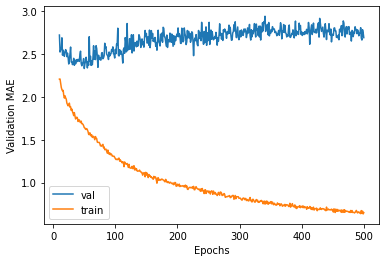

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(10, len(average_mae_history) + 1), average_mae_history[9:], label ='val')
plt.plot(range(10, len(average_mae_history) + 1), average_mae_history_train[9:], label ='train')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()

## Exercise 9

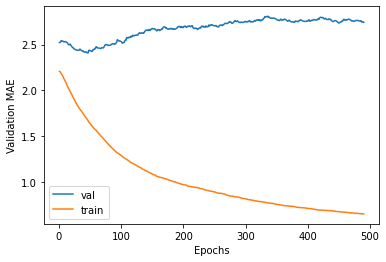

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
smooth_mae_history_train = smooth_curve(average_mae_history_train[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history,label ='val')
plt.plot(range(1, len(smooth_mae_history_train) + 1), smooth_mae_history_train, label ='train')

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.legend()
plt.show()
